In [15]:
# import sys
# !{sys.executable} -m pip install dill

In [16]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

countries_dataframe = pd.read_sql('SELECT * from Country', conn)
leaugues_dataframe = pd.read_sql('SELECT * from League', conn)
matches_dataframe = pd.read_sql('SELECT * from Match', conn)
players_dataframe = pd.read_sql('SELECT * from Player', conn)
player_attributes_dataframe = pd.read_sql('SELECT * from Player_Attributes', conn)
teams_dataframe = pd.read_sql('SELECT * from Team', conn)
team_attributes_dataframe = pd.read_sql('SELECT * from Team_Attributes', conn)

# from IPython.display import display, HTML

# display(HTML(leaugues_dataframe.to_html()))
# display(HTML(countries_dataframe.to_html()))


Najważniejsza będzie dla nas będzie matches_dataframe, ponieważ postaramy się przewidzieć wyniki meczy

In [17]:
print(matches_dataframe.season.unique())

def split_date(x):
    return x.split()[0]

matches_dataframe.date = matches_dataframe["date"].apply(split_date)
team_attributes_dataframe.date = team_attributes_dataframe["date"].apply(split_date)
print(matches_dataframe.date)     # usuwamy zbedna godzine w dacie

['2008/2009' '2009/2010' '2010/2011' '2011/2012' '2012/2013' '2013/2014'
 '2014/2015' '2015/2016']
0        2008-08-17
1        2008-08-16
2        2008-08-16
3        2008-08-17
4        2008-08-16
            ...    
25974    2015-09-22
25975    2015-09-23
25976    2015-09-23
25977    2015-09-22
25978    2015-09-23
Name: date, Length: 25979, dtype: object


In [18]:
matches_dataframe = matches_dataframe.sort_values(by="date")
print("Dane począwszy od", matches_dataframe.date.iloc[0].split()[0], "aż do", matches_dataframe.date.iloc[-1].split()[0])

Dane począwszy od 2008-07-18 aż do 2016-05-25


In [19]:
print(players_dataframe.loc[players_dataframe["player_name"]=="Didier Drogba"])
# 122827
print("--------------------------------")
print(len(player_attributes_dataframe.loc[player_attributes_dataframe["player_api_id"]==30822]))

        id  player_api_id    player_name  player_fifa_api_id  \
2599  2602          30822  Didier Drogba               31432   

                 birthday  height  weight  
2599  1978-03-11 00:00:00  187.96     176  
--------------------------------
34


In [20]:
df_towork = matches_dataframe[["country_id","league_id","season","stage", "date","match_api_id","home_team_api_id","away_team_api_id","home_team_goal","away_team_goal"]]
df_towork = df_towork.reset_index()
df_towork.drop('index', inplace=True, axis=1)
df_towork

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,24558,24558,2008/2009,1,2008-07-18,486263,10192,9931,1,2
1,24558,24558,2008/2009,1,2008-07-19,486264,9930,10179,3,1
2,24558,24558,2008/2009,1,2008-07-20,486265,10199,9824,1,2
3,24558,24558,2008/2009,1,2008-07-20,486266,7955,10243,1,2
4,24558,24558,2008/2009,2,2008-07-23,486268,6493,7955,1,2
...,...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,36,2016-05-25,1992225,9931,9956,0,1
25975,24558,24558,2015/2016,36,2016-05-25,1992226,7896,10190,3,0
25976,24558,24558,2015/2016,36,2016-05-25,1992227,10199,10179,2,2
25977,24558,24558,2015/2016,36,2016-05-25,1992228,10191,10192,0,3


In [21]:
# for i in range(len(leaugues_dataframe)):
#     print(leaugues_dataframe.loc[i,("country_id")], " : '", leaugues_dataframe.loc[i,("name")], "', ", end="", sep="")
# leaugues_dataframe

dictionary = {1 : 'Belgium Jupiler League', 1729 : 'England Premier League', 4769 : 'France Ligue 1', 7809 : 'Germany 1. Bundesliga', 10257 : 'Italy Serie A', 13274 : 'Netherlands Eredivisie', 15722 : 'Poland Ekstraklasa', 17642 : 'Portugal Liga ZON Sagres', 19694 : 'Scotland Premier League', 21518 : 'Spain LIGA BBVA', 24558 : 'Switzerland Super League'}
df_towork.replace({"league_id": dictionary}, inplace=True)

In [22]:
import numpy as np
df_towork["nr_of_prev_home_occurences"] = np.zeros(len(df_towork))
df_towork["nr_of_prev_away_occurences"] = np.zeros(len(df_towork))
df_towork

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,nr_of_prev_home_occurences,nr_of_prev_away_occurences
0,24558,Switzerland Super League,2008/2009,1,2008-07-18,486263,10192,9931,1,2,0.0,0.0
1,24558,Switzerland Super League,2008/2009,1,2008-07-19,486264,9930,10179,3,1,0.0,0.0
2,24558,Switzerland Super League,2008/2009,1,2008-07-20,486265,10199,9824,1,2,0.0,0.0
3,24558,Switzerland Super League,2008/2009,1,2008-07-20,486266,7955,10243,1,2,0.0,0.0
4,24558,Switzerland Super League,2008/2009,2,2008-07-23,486268,6493,7955,1,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992225,9931,9956,0,1,0.0,0.0
25975,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992226,7896,10190,3,0,0.0,0.0
25976,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992227,10199,10179,2,2,0.0,0.0
25977,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992228,10191,10192,0,3,0.0,0.0


In [23]:
teams_dataframe["occurences"] = np.zeros(len(teams_dataframe))
teams_dataframe["history_of_team_matches"]  = [list() for x in range(len(teams_dataframe.index))]    # (kto_wygral, gole_strzelone, gole_stracone) , kto wygral: 0-druzyna przegrala, 1-wygrala, 2-zremisowala
# teams_dataframe["wins"] = np.zeros(len(teams_dataframe))
# teams_dataframe["defeats"] = np.zeros(len(teams_dataframe))
# teams_dataframe["draws"] = np.zeros(len(teams_dataframe))
# teams_dataframe["goals_scored"] = np.zeros(len(teams_dataframe))
# teams_dataframe["goals_conceded"] = np.zeros(len(teams_dataframe))

for i in range(len(df_towork)):
    df_towork.loc[i,("nr_of_prev_home_occurences")] = teams_dataframe.loc[teams_dataframe["team_api_id"]==df_towork.iloc[i]["home_team_api_id"], ('occurences')].values[0]
    df_towork.loc[i,("nr_of_prev_away_occurences")] = teams_dataframe.loc[teams_dataframe["team_api_id"]==df_towork.iloc[i]["away_team_api_id"], ('occurences')].values[0]
    teams_dataframe.loc[teams_dataframe["team_api_id"]==df_towork.iloc[i]["home_team_api_id"], ('occurences')] +=1
    teams_dataframe.loc[teams_dataframe["team_api_id"]==df_towork.iloc[i]["away_team_api_id"], ('occurences')] +=1
    
    # teams_dataframe["wins"] = np.zeros(len(teams_dataframe))
    # teams_dataframe["defeats"] = np.zeros(len(teams_dataframe))
    # teams_dataframe["draws"] = np.zeros(len(teams_dataframe))
    # teams_dataframe["goals_scored"] = np.zeros(len(teams_dataframe))
    # teams_dataframe["goals_conceded"] = np.zeros(len(teams_dataframe))

    h_goals = df_towork.iloc[i]["home_team_goal"]
    a_goals = df_towork.iloc[i]["away_team_goal"]
    res_for_home = (1 if h_goals>a_goals else 0 if a_goals>h_goals else 2,h_goals,a_goals)
    res_for_away = (1 if h_goals<a_goals else 0 if a_goals<h_goals else 2,a_goals,h_goals)

    teams_dataframe.loc[teams_dataframe["team_api_id"]==df_towork.iloc[i]["home_team_api_id"], ('history_of_team_matches')].values[0].append( res_for_home )
    teams_dataframe.loc[teams_dataframe["team_api_id"]==df_towork.iloc[i]["away_team_api_id"], ('history_of_team_matches')].values[0].append( res_for_away )

In [24]:
teams_dataframe

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,occurences,history_of_team_matches
0,1,9987,673.0,KRC Genk,GEN,212.0,"[(2, 1, 1), (0, 1, 3), (1, 1, 0), (1, 3, 1), (..."
1,2,9993,675.0,Beerschot AC,BAC,152.0,"[(2, 1, 1), (2, 1, 1), (0, 0, 1), (1, 3, 0), (..."
2,3,10000,15005.0,SV Zulte-Waregem,ZUL,212.0,"[(2, 0, 0), (1, 2, 0), (0, 1, 3), (0, 0, 2), (..."
3,4,9994,2007.0,Sporting Lokeren,LOK,212.0,"[(2, 0, 0), (1, 4, 1), (0, 0, 1), (2, 1, 1), (..."
4,5,9984,1750.0,KSV Cercle Brugge,CEB,182.0,"[(0, 0, 3), (0, 1, 2), (1, 2, 1), (0, 2, 3), (..."
...,...,...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL,216.0,"[(1, 2, 0), (2, 1, 1), (0, 0, 1), (2, 1, 1), (..."
295,49837,10191,1715.0,FC Thun,THU,214.0,"[(2, 1, 1), (1, 3, 2), (2, 2, 2), (1, 3, 0), (..."
296,50201,9777,324.0,Servette FC,SER,70.0,"[(0, 1, 2), (1, 3, 2), (2, 1, 1), (1, 4, 2), (..."
297,50204,7730,1862.0,FC Lausanne-Sports,LAU,106.0,"[(0, 0, 2), (1, 2, 1), (0, 0, 1), (0, 2, 4), (..."


In [25]:
# prev = 7
# his = teams_dataframe.loc[0,("history_of_team_matches")]

# last5 = [ his[max(0,prev-5):prev] ]
# last5

# df_towork["last5_home"]  = [list() for x in range(len(df_towork.index))]    #usunac
# df_towork["last5_away"]  = [list() for x in range(len(df_towork.index))]    #usunac
df_towork["nr_of_prev_home_occurences"] = df_towork["nr_of_prev_home_occurences"].apply(int)
df_towork["nr_of_prev_away_occurences"] = df_towork["nr_of_prev_away_occurences"].apply(int)

df_towork["last5_home_wins"] = np.zeros(len(df_towork))
df_towork["last5_home_draws"] = np.zeros(len(df_towork))
df_towork["last5_home_defeats"] = np.zeros(len(df_towork))
df_towork["last5_away_wins"] = np.zeros(len(df_towork))
df_towork["last5_away_draws"] = np.zeros(len(df_towork))
df_towork["last5_away_defeats"] = np.zeros(len(df_towork))

df_towork["last5_home_goals_scored"] = np.zeros(len(df_towork))
df_towork["last5_away_goals_scored"] = np.zeros(len(df_towork))
df_towork["last5_home_goals_conceded"] = np.zeros(len(df_towork))
df_towork["last5_away_goals_conceded"] = np.zeros(len(df_towork))

#######################
df_towork["last10_home_wins"] = np.zeros(len(df_towork))
df_towork["last10_home_draws"] = np.zeros(len(df_towork))
df_towork["last10_home_defeats"] = np.zeros(len(df_towork))
df_towork["last10_away_wins"] = np.zeros(len(df_towork))
df_towork["last10_away_draws"] = np.zeros(len(df_towork))
df_towork["last10_away_defeats"] = np.zeros(len(df_towork))

df_towork["last10_home_goals_scored"] = np.zeros(len(df_towork))
df_towork["last10_away_goals_scored"] = np.zeros(len(df_towork))
df_towork["last10_home_goals_conceded"] = np.zeros(len(df_towork))
df_towork["last10_away_goals_conceded"] = np.zeros(len(df_towork))
#######################

for i in range(len(df_towork)):
    his_home = teams_dataframe.loc[teams_dataframe["team_api_id"]==df_towork.iloc[i]["home_team_api_id"], ('history_of_team_matches')].values[0]
    his_away = teams_dataframe.loc[teams_dataframe["team_api_id"]==df_towork.iloc[i]["away_team_api_id"], ('history_of_team_matches')].values[0]
    prev_home = df_towork.loc[i,("nr_of_prev_home_occurences")]
    prev_away = df_towork.loc[i,("nr_of_prev_away_occurences")]

    ######################
    his_home10 = his_home[max(0,prev_home-10):prev_home]
    if len(his_home10)<10:
        for j in range(10-len(his_home10)):
            his_home10.append(np.random.randint(low=0,high=3,size=3))
    his_away10 = his_away[max(0,prev_away-10):prev_away]
    if len(his_away10)<10:
        for j in range(10-len(his_away10)):
            his_away10.append(np.random.randint(low=0,high=3,size=3))

    df_towork.loc[i,"last10_home_goals_scored"] = sum([i for i in [arr[1] for arr in his_home10]])
    df_towork.loc[i,"last10_away_goals_scored"] = sum([i for i in [arr[1] for arr in his_away10]])
    df_towork.loc[i,"last10_home_goals_conceded"] = sum([i for i in [arr[2] for arr in his_home10]])
    df_towork.loc[i,"last10_away_goals_conceded"] = sum([i for i in [arr[2] for arr in his_away10]])

    df_towork.loc[i,"last10_home_defeats"] = len([i for i in [arr[0] for arr in his_home10] if i==0])
    df_towork.loc[i,"last10_away_defeats"] = len([i for i in [arr[0] for arr in his_away10] if i==0])
    df_towork.loc[i,"last10_home_wins"] = len([i for i in [arr[0] for arr in his_home10] if i==1])
    df_towork.loc[i,"last10_away_wins"] = len([i for i in [arr[0] for arr in his_away10] if i==1])
    df_towork.loc[i,"last10_home_draws"] = len([i for i in [arr[0] for arr in his_home10] if i==2])
    df_towork.loc[i,"last10_away_draws"] = len([i for i in [arr[0] for arr in his_away10] if i==2])


    #######################

    his_home = his_home[max(0,prev_home-5):prev_home]
    if len(his_home)<5:
        for j in range(5-len(his_home)):
            his_home.append(np.random.randint(low=0,high=3,size=3))
    his_away = his_away[max(0,prev_away-5):prev_away]
    if len(his_away)<5:
        for j in range(5-len(his_away)):
            his_away.append(np.random.randint(low=0,high=3,size=3))

    df_towork.loc[i,"last5_home_goals_scored"] = sum([i for i in [arr[1] for arr in his_home]])
    df_towork.loc[i,"last5_away_goals_scored"] = sum([i for i in [arr[1] for arr in his_away]])
    df_towork.loc[i,"last5_home_goals_conceded"] = sum([i for i in [arr[2] for arr in his_home]])
    df_towork.loc[i,"last5_away_goals_conceded"] = sum([i for i in [arr[2] for arr in his_away]])

    df_towork.loc[i,"last5_home_defeats"] = len([i for i in [arr[0] for arr in his_home] if i==0])
    df_towork.loc[i,"last5_away_defeats"] = len([i for i in [arr[0] for arr in his_away] if i==0])
    df_towork.loc[i,"last5_home_wins"] = len([i for i in [arr[0] for arr in his_home] if i==1])
    df_towork.loc[i,"last5_away_wins"] = len([i for i in [arr[0] for arr in his_away] if i==1])
    df_towork.loc[i,"last5_home_draws"] = len([i for i in [arr[0] for arr in his_home] if i==2])
    df_towork.loc[i,"last5_away_draws"] = len([i for i in [arr[0] for arr in his_away] if i==2])

    # df_towork.loc[i,("last5_home")].append( his_home )
    # df_towork.loc[i,("last5_away")].append( his_away )

In [26]:
df_towork

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,last10_home_wins,last10_home_draws,last10_home_defeats,last10_away_wins,last10_away_draws,last10_away_defeats,last10_home_goals_scored,last10_away_goals_scored,last10_home_goals_conceded,last10_away_goals_conceded
0,24558,Switzerland Super League,2008/2009,1,2008-07-18,486263,10192,9931,1,2,...,4.0,5.0,1.0,1.0,4.0,5.0,13.0,10.0,11.0,10.0
1,24558,Switzerland Super League,2008/2009,1,2008-07-19,486264,9930,10179,3,1,...,2.0,5.0,3.0,4.0,3.0,3.0,15.0,13.0,9.0,11.0
2,24558,Switzerland Super League,2008/2009,1,2008-07-20,486265,10199,9824,1,2,...,5.0,2.0,3.0,1.0,2.0,7.0,10.0,7.0,13.0,8.0
3,24558,Switzerland Super League,2008/2009,1,2008-07-20,486266,7955,10243,1,2,...,4.0,0.0,6.0,3.0,3.0,4.0,7.0,10.0,12.0,11.0
4,24558,Switzerland Super League,2008/2009,2,2008-07-23,486268,6493,7955,1,2,...,5.0,3.0,2.0,2.0,3.0,5.0,8.0,16.0,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992225,9931,9956,0,1,...,6.0,3.0,1.0,2.0,3.0,5.0,25.0,9.0,13.0,13.0
25975,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992226,7896,10190,3,0,...,2.0,2.0,6.0,2.0,2.0,6.0,10.0,11.0,23.0,26.0
25976,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992227,10199,10179,2,2,...,7.0,2.0,1.0,4.0,3.0,3.0,26.0,15.0,8.0,14.0
25977,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992228,10191,10192,0,3,...,2.0,5.0,3.0,7.0,0.0,3.0,14.0,29.0,14.0,16.0


In [27]:
# team_attributes_dataframe[]
team_attributes_dataframe

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [28]:
# a = team_attributes_dataframe["defenceDefenderLineClass"].notnull().sum()
# b = team_attributes_dataframe["defenceDefenderLineClass"].isnull().sum()

# print("Non NaNs = ", a, "Nans =", b)

fifa_statistics = team_attributes_dataframe.iloc[:, range(4,25)]
fifa_statistics

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


Problem z NaNami mamy tylko w kolumnie "buildUpPlayDribbling"

In [29]:
list_of_nans = []
for i in range(21):
    list_of_nans.append(fifa_statistics.iloc[:,i].isnull().sum())
print(list_of_nans)
print("\nWartości statystyki \"buildUpPlayDribbling\"",fifa_statistics.iloc[:,2].unique())
fifa_statistics.iloc[:,[2]]

[0, 0, 969, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Wartości statystyki "buildUpPlayDribbling" [nan 48. 41. 64. 57. 70. 53. 47. 40. 43. 46. 61. 49. 66. 51. 32. 37. 45.
 52. 50. 38. 55. 35. 63. 30. 29. 34. 24. 39. 31. 60. 44. 36. 56. 54. 33.
 59. 58. 42. 69. 62. 67. 65. 77. 28. 68. 71. 26. 27. 74.]


,buildUpPlayDribbling
0,NaN
1,48.0
2,41.0
3,NaN
4,NaN
...,...
1453,NaN
1454,NaN
1455,NaN
1456,42.0


In [30]:
team_attributes_dataframe

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [31]:
median = np.nanmedian(team_attributes_dataframe["buildUpPlayDribbling"])
team_attributes_dataframe["buildUpPlayDribbling"] = team_attributes_dataframe["buildUpPlayDribbling"].fillna(median)

In [32]:
print(list(team_attributes_dataframe))

['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayDribbling', 'buildUpPlayDribblingClass', 'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass', 'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass', 'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass']


In [33]:
team_attributes_dataframe["attacking_stats"] = np.zeros(len(team_attributes_dataframe))
team_attributes_dataframe["midfield_stats"] = np.zeros(len(team_attributes_dataframe))
team_attributes_dataframe["defensive_stats"] = np.zeros(len(team_attributes_dataframe))

for i in range(len(team_attributes_dataframe)):
    team_attributes_dataframe.loc[i,("attacking_stats")] = sum(team_attributes_dataframe.loc[i, ['chanceCreationShooting',"buildUpPlaySpeed","buildUpPlayDribbling"]])
    team_attributes_dataframe.loc[i,("midfield_stats")] = sum(team_attributes_dataframe.loc[i, ["chanceCreationPassing","buildUpPlayPassing",'chanceCreationPassing','chanceCreationCrossing']])
    team_attributes_dataframe.loc[i,("defensive_stats")] = sum(team_attributes_dataframe.loc[i, ["defenceAggression",'defencePressure']])
team_attributes_dataframe.drop(['chanceCreationShooting',"buildUpPlaySpeed","buildUpPlayDribbling","chanceCreationPassing","buildUpPlayPassing",'chanceCreationPassing','chanceCreationCrossing',"defenceAggression",'defencePressure',"defenceTeamWidth"], axis = 1, inplace=True)

Bede korzystal z tego

In [34]:
# zostawie tylko kluczowe style gry
fifa_statistics = team_attributes_dataframe[['id','team_api_id', 'date','buildUpPlayPositioningClass','chanceCreationPositioningClass','defencePressureClass','defenceTeamWidthClass', 'attacking_stats', 'midfield_stats', 'defensive_stats']]

mylist = list(fifa_statistics)
mylist = mylist[3:]

for i in mylist[:4]:
    print(i," : ", fifa_statistics[i].mode().values[0])
for i in mylist[4:]:
    print(i," : ", fifa_statistics[i].median())

new_row = {
    'id':len(fifa_statistics)+1, 'team_api_id':0, 'date':"2000-01-01",
    'buildUpPlayPositioningClass': 'Organised', 
    'chanceCreationPositioningClass': 'Organised',
    'defencePressureClass' :  'Medium',
    'defenceTeamWidthClass'  :  'Normal',
    'attacking_stats'  :  154.0,
    'midfield_stats'  :  206.0,
    'defensive_stats'  :  93.0,
    }
fifa_statistics = fifa_statistics.append(new_row, ignore_index=True);
fifa_statistics

buildUpPlayPositioningClass  :  Organised
chanceCreationPositioningClass  :  Organised
defencePressureClass  :  Medium
defenceTeamWidthClass  :  Normal
attacking_stats  :  154.0
midfield_stats  :  206.0
defensive_stats  :  93.0


C:\Users\barto\AppData\Local\Temp\ipykernel_10872\593313323.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_statistics = fifa_statistics.append(new_row, ignore_index=True);


,id,team_api_id,date,buildUpPlayPositioningClass,chanceCreationPositioningClass,defencePressureClass,defenceTeamWidthClass,attacking_stats,midfield_stats,defensive_stats
0,1,9930,2010-02-22,Organised,Organised,Medium,Normal,164.0,235.0,105.0
1,2,9930,2014-09-19,Organised,Organised,Medium,Normal,164.0,227.0,91.0
2,3,9930,2015-09-10,Organised,Organised,Medium,Normal,152.0,225.0,91.0
3,4,8485,2010-02-22,Organised,Organised,Medium,Wide,189.0,280.0,130.0
4,5,8485,2011-02-22,Organised,Organised,Medium,Normal,148.0,206.0,94.0
...,...,...,...,...,...,...,...,...,...,...
1454,1455,10000,2012-02-22,Organised,Organised,Medium,Normal,153.0,197.0,99.0
1455,1456,10000,2013-09-20,Organised,Organised,Medium,Normal,135.0,197.0,102.0
1456,1457,10000,2014-09-19,Organised,Organised,Medium,Normal,128.0,197.0,102.0
1457,1458,10000,2015-09-10,Organised,Organised,Medium,Normal,128.0,197.0,102.0


oraz tego

In [35]:
df_towork

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,last10_home_wins,last10_home_draws,last10_home_defeats,last10_away_wins,last10_away_draws,last10_away_defeats,last10_home_goals_scored,last10_away_goals_scored,last10_home_goals_conceded,last10_away_goals_conceded
0,24558,Switzerland Super League,2008/2009,1,2008-07-18,486263,10192,9931,1,2,...,4.0,5.0,1.0,1.0,4.0,5.0,13.0,10.0,11.0,10.0
1,24558,Switzerland Super League,2008/2009,1,2008-07-19,486264,9930,10179,3,1,...,2.0,5.0,3.0,4.0,3.0,3.0,15.0,13.0,9.0,11.0
2,24558,Switzerland Super League,2008/2009,1,2008-07-20,486265,10199,9824,1,2,...,5.0,2.0,3.0,1.0,2.0,7.0,10.0,7.0,13.0,8.0
3,24558,Switzerland Super League,2008/2009,1,2008-07-20,486266,7955,10243,1,2,...,4.0,0.0,6.0,3.0,3.0,4.0,7.0,10.0,12.0,11.0
4,24558,Switzerland Super League,2008/2009,2,2008-07-23,486268,6493,7955,1,2,...,5.0,3.0,2.0,2.0,3.0,5.0,8.0,16.0,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992225,9931,9956,0,1,...,6.0,3.0,1.0,2.0,3.0,5.0,25.0,9.0,13.0,13.0
25975,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992226,7896,10190,3,0,...,2.0,2.0,6.0,2.0,2.0,6.0,10.0,11.0,23.0,26.0
25976,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992227,10199,10179,2,2,...,7.0,2.0,1.0,4.0,3.0,3.0,26.0,15.0,8.0,14.0
25977,24558,Switzerland Super League,2015/2016,36,2016-05-25,1992228,10191,10192,0,3,...,2.0,5.0,3.0,7.0,0.0,3.0,14.0,29.0,14.0,16.0


In [36]:
df_towork['home_attacking_stats'] = np.zeros(len(df_towork))
df_towork['home_midfield_stats'] = np.zeros(len(df_towork))
df_towork['home_defensive_stats'] = np.zeros(len(df_towork))
df_towork['away_attacking_stats'] = np.zeros(len(df_towork))
df_towork['away_midfield_stats'] = np.zeros(len(df_towork))
df_towork['away_defensive_stats'] = np.zeros(len(df_towork))

In [37]:
for i in range(len(df_towork)):
    fifa_dates_home = list(fifa_statistics.loc[fifa_statistics["team_api_id"]==df_towork.iloc[i]["home_team_api_id"],("date")])
    fifa_dates_away = list(fifa_statistics.loc[fifa_statistics["team_api_id"]==df_towork.iloc[i]["away_team_api_id"],("date")])
    match_date = df_towork.iloc[i]["date"]

    day_of_stats_home = ""
    day_of_stats_away = ""

    if len(fifa_dates_home)!=0:
        dates_home = [j for j in fifa_dates_home if j<match_date]
        day_of_stats_home = max(dates_home) if len(dates_home)!=0 else fifa_dates_home[0]
        df_towork.loc[i,("home_attacking_stats")] = fifa_statistics.loc[ ((fifa_statistics["team_api_id"]==df_towork.iloc[i]["home_team_api_id"]) & (fifa_statistics["date"]==day_of_stats_home)),("attacking_stats") ].values[0]
        df_towork.loc[i,("home_midfield_stats")] = fifa_statistics.loc[ ((fifa_statistics["team_api_id"]==df_towork.iloc[i]["home_team_api_id"]) & (fifa_statistics["date"]==day_of_stats_home)),("midfield_stats") ].values[0]
        df_towork.loc[i,("home_defensive_stats")] = fifa_statistics.loc[ ((fifa_statistics["team_api_id"]==df_towork.iloc[i]["home_team_api_id"]) & (fifa_statistics["date"]==day_of_stats_home)),("defensive_stats") ].values[0]
    else:
        df_towork.loc[i,("home_attacking_stats")] = fifa_statistics.loc[ len(fifa_statistics)-1,("attacking_stats") ]
        df_towork.loc[i,("home_midfield_stats")] = fifa_statistics.loc[ len(fifa_statistics)-1,("midfield_stats") ]
        df_towork.loc[i,("home_defensive_stats")] = fifa_statistics.loc[ len(fifa_statistics)-1,("defensive_stats") ]
   
  
    if len(fifa_dates_away)!=0:
        dates_away = [j for j in fifa_dates_away if j<match_date]
        day_of_stats_away = max(dates_away) if len(dates_away)!=0 else fifa_dates_away[0]
        df_towork.loc[i,("away_attacking_stats")] = fifa_statistics.loc[ ((fifa_statistics["team_api_id"]==df_towork.iloc[i]["away_team_api_id"]) & (fifa_statistics["date"]==day_of_stats_away)),("attacking_stats") ].values[0]
        df_towork.loc[i,("away_midfield_stats")] = fifa_statistics.loc[ ((fifa_statistics["team_api_id"]==df_towork.iloc[i]["away_team_api_id"]) & (fifa_statistics["date"]==day_of_stats_away)),("midfield_stats") ].values[0]
        df_towork.loc[i,("away_defensive_stats")] = fifa_statistics.loc[ ((fifa_statistics["team_api_id"]==df_towork.iloc[i]["away_team_api_id"]) & (fifa_statistics["date"]==day_of_stats_away)),("defensive_stats") ].values[0]
    else:
        df_towork.loc[i,("away_attacking_stats")] = fifa_statistics.loc[ len(fifa_statistics)-1,("attacking_stats") ]
        df_towork.loc[i,("away_midfield_stats")] = fifa_statistics.loc[ len(fifa_statistics)-1,("midfield_stats") ]
        df_towork.loc[i,("away_defensive_stats")] = fifa_statistics.loc[ len(fifa_statistics)-1,("defensive_stats") ]



In [38]:
df_towork['year'] = np.zeros(len(df_towork))
df_towork['month'] = np.zeros(len(df_towork))
df_towork['day'] = np.zeros(len(df_towork))
for i in range(len(df_towork)):
    date = df_towork.loc[i, ("date") ].split('-')
    df_towork.loc[i,("year")] = int(date[0])
    df_towork.loc[i,("month")] = int(date[1])
    df_towork.loc[i,("day")] = int(date[2])

### OSTATECZNY ZBIÓR DANYCH NA PODSTAWIE KTÓREGO BĘDZIEMY PRÓBOWALI PRZEWIDZIEĆ

In [39]:
print(list(df_towork))
final_df = df_towork.drop(['date','country_id','match_api_id', 'home_team_goal', 'away_team_goal', 'nr_of_prev_home_occurences', 'nr_of_prev_away_occurences',], axis = 1)
print("\n\n",list(final_df))

['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'nr_of_prev_home_occurences', 'nr_of_prev_away_occurences', 'last5_home_wins', 'last5_home_draws', 'last5_home_defeats', 'last5_away_wins', 'last5_away_draws', 'last5_away_defeats', 'last5_home_goals_scored', 'last5_away_goals_scored', 'last5_home_goals_conceded', 'last5_away_goals_conceded', 'last10_home_wins', 'last10_home_draws', 'last10_home_defeats', 'last10_away_wins', 'last10_away_draws', 'last10_away_defeats', 'last10_home_goals_scored', 'last10_away_goals_scored', 'last10_home_goals_conceded', 'last10_away_goals_conceded', 'home_attacking_stats', 'home_midfield_stats', 'home_defensive_stats', 'away_attacking_stats', 'away_midfield_stats', 'away_defensive_stats', 'year', 'month', 'day']


 ['league_id', 'season', 'stage', 'home_team_api_id', 'away_team_api_id', 'last5_home_wins', 'last5_home_draws', 'last5_home_defeats', 'last5_away_

In [40]:
final_df = pd.get_dummies(final_df,columns=["league_id","season"])
final_df

,stage,home_team_api_id,away_team_api_id,last5_home_wins,last5_home_draws,last5_home_defeats,last5_away_wins,last5_away_draws,last5_away_defeats,last5_home_goals_scored,...,league_id_Spain LIGA BBVA,league_id_Switzerland Super League,season_2008/2009,season_2009/2010,season_2010/2011,season_2011/2012,season_2012/2013,season_2013/2014,season_2014/2015,season_2015/2016
0,1,10192,9931,3.0,1.0,1.0,1.0,2.0,2.0,4.0,...,0,1,1,0,0,0,0,0,0,0
1,1,9930,10179,1.0,2.0,2.0,1.0,2.0,2.0,7.0,...,0,1,1,0,0,0,0,0,0,0
2,1,10199,9824,4.0,1.0,0.0,3.0,1.0,1.0,4.0,...,0,1,1,0,0,0,0,0,0,0
3,1,7955,10243,0.0,4.0,1.0,1.0,1.0,3.0,4.0,...,0,1,1,0,0,0,0,0,0,0
4,2,6493,7955,1.0,3.0,1.0,1.0,1.0,3.0,4.0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,36,9931,9956,3.0,1.0,1.0,1.0,1.0,3.0,9.0,...,0,1,0,0,0,0,0,0,0,1
25975,36,7896,10190,1.0,2.0,2.0,1.0,1.0,3.0,6.0,...,0,1,0,0,0,0,0,0,0,1
25976,36,10199,10179,4.0,1.0,0.0,1.0,2.0,2.0,14.0,...,0,1,0,0,0,0,0,0,0,1
25977,36,10191,10192,1.0,4.0,0.0,3.0,0.0,2.0,8.0,...,0,1,0,0,0,0,0,0,0,1


######################################################################################################################################

### MODELE

y - 0-jesli wygrał gospodarz, 1-jeśli wygrał gość, 2-jeśli był remis

(zrobic na poczatku wykres wygranych przez gospodarzy)

In [41]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [42]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [43]:
y = np.zeros(len(final_df))

for i in range(len(final_df)):
    if df_towork.loc[i,"home_team_goal"]>df_towork.loc[i,"away_team_goal"]:
        y[i] = 0
    elif df_towork.loc[i,"home_team_goal"]<df_towork.loc[i,"away_team_goal"]:
        y[i] = 1
    else:
        y[i] = 2
        
print("Ilość wygranych gospodarzy:", sum(y==0), "-", sum(y==0)*100/len(y),"%"
    "\nIlość wygranych gości:", sum(y==1), "-", sum(y==1)*100/len(y),"%",
    "\nIlość remisów:", sum(y==2), "-", sum(y==2)*100/len(y),"%"
    )

Ilość wygranych gospodarzy: 11917 - 45.87166557604219 %
Ilość wygranych gości: 7466 - 28.738596558759 % 
Ilość remisów: 6596 - 25.389737865198814 %


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
print(y)

print("Ilość wygranych gospodarzy:", sum(y_test==0), "-", sum(y_test==0)*100/len(y_test),"%"
    "\nIlość wygranych gości:", sum(y_test==1), "-", sum(y_test==1)*100/len(y_test),"%",
    "\nIlość remisów:", sum(y_test==2), "-", sum(y_test==2)*100/len(y_test),"%"
    )

[1. 0. 1. ... 2. 1. 0.]
Ilość wygranych gospodarzy: 2358 - 45.3810623556582 %
Ilość wygranych gości: 1512 - 29.099307159353348 % 
Ilość remisów: 1326 - 25.519630484988454 %


* Softmax

In [89]:
from sklearn.linear_model import LogisticRegression

param_grid_softmax = {'C': [np.power(10.,i) for i in range(-10,5)]
             ,'fit_intercept': [True, False]
             ,'penalty': ['elasticnet','none','l2','l1']}

grid_softmax = GridSearchCV(LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200), param_grid_softmax, cv=kfold)

In [90]:
grid_softmax.fit(X_train, y_train)

c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1116: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1116: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\barto\AppData\Local

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=LogisticRegression(max_iter=200,
                                          multi_class='multinomial'),
             param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                               0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                               10000.0],
                         'fit_intercept': [True, False],
                         'penalty': ['elasticnet', 'none', 'l2', 'l1']})

In [91]:
print(grid_softmax.best_params_)
model_soft = grid_softmax.best_estimator_
from sklearn import  metrics
print("precision_score: {}".format(metrics.precision_score(y_test, model_soft.predict(X_test),average='weighted') ))
print("recall_score: {}".format( metrics.recall_score(y_test, model_soft.predict(X_test),average='weighted') ))
print("f1_score: {}".format( metrics.f1_score(y_test, model_soft.predict(X_test),average='weighted') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model_soft.predict(X_test)) ))

{'C': 1000.0, 'fit_intercept': False, 'penalty': 'l2'}
precision_score: 0.3571879087328607
recall_score: 0.4859507313317937
f1_score: 0.3963853301447647
accuracy_score: 0.4859507313317937


* SVM

In [97]:
from sklearn.svm import SVC

param_grid_svc = {
            'C': [0.01, 0.1, 1, 5, 10, 15, 100],
            'gamma': ["auto","scale"],
            'coef0': [0,1,2],
}

grid_SVC = GridSearchCV(SVC(kernel='rbf'), param_grid_svc, cv=kfold)

In [98]:
grid_SVC.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 15, 100],
                         'coef0': [0, 1, 2], 'gamma': ['auto', 'scale']})

In [100]:
print(grid_SVC.best_params_)
model_SVC = grid_SVC.best_estimator_
from sklearn import  metrics
print("precision_score: {}".format(metrics.precision_score(y_test, model_SVC.predict(X_test),average='weighted') ))
print("recall_score: {}".format( metrics.recall_score(y_test, model_SVC.predict(X_test),average='weighted') ))
print("f1_score: {}".format( metrics.f1_score(y_test, model_SVC.predict(X_test),average='weighted') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model_SVC.predict(X_test)) ))

{'C': 15, 'coef0': 0, 'gamma': 'scale'}


c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision_score: 0.29546277514927705
recall_score: 0.45304080061585833
f1_score: 0.28587519649365956
accuracy_score: 0.45304080061585833


* K-nearest neighbours

In [53]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
            'n_neighbors': [i for i in np.arange(0,100,5)],
            'algorithm': ['kd_tree','ball_tree'],
            'leaf_size': [i for i in np.arange(10,100,10)],
}

grid_knn = GridSearchCV(KNeighborsClassifier(n_neighbors=100, p=2, metric='minkowski'), param_grid_knn, cv=kfold)

In [54]:
grid_knn.fit(X_train, y_train)

c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearnex\neighbors\knn_classification.py", line 220, in fit
    dispatch(self, 'neighbors.KNeighborsClassifier.fit', {
  File "c:\Users\barto\AppData\Local\Programs\P

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=100),
             param_grid={'algorithm': ['kd_tree', 'ball_tree'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'n_neighbors': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                                         50, 55, 60, 65, 70, 75, 80, 85, 90,
                                         95]})

In [60]:
print(grid_knn.best_params_)
model_knn = grid_knn.best_estimator_
from sklearn import  metrics
print("precision_score: {}".format(metrics.precision_score(y_test, model_knn.predict(X_test),average='weighted') ))
print("recall_score: {}".format( metrics.recall_score(y_test, model_knn.predict(X_test),average='weighted') ))
print("f1_score: {}".format( metrics.f1_score(y_test, model_knn.predict(X_test),average='weighted') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model_knn.predict(X_test)) ))

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 55}
precision_score: 0.39916261488851895
recall_score: 0.46016166281755194
f1_score: 0.3765373793517054
accuracy_score: 0.46016166281755194


* Decision Tree 

In [56]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

param_grid_dtc = {
            'max_depth': [i for i in np.arange(10,50,5)],
            'max_features': ["sqrt","log2"],
            'min_samples_leaf': [i for i in np.arange(1,10,1)],
            'min_samples_split': [i for i in np.arange(2,10,2)],
}

grid_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=kfold)

In [57]:
grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25, 30, 35, 40, 45],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 4, 6, 8]})

In [58]:
print(grid_dtc.best_params_)
model_dtc = grid_dtc.best_estimator_
from sklearn import  metrics
print("precision_score: {}".format(metrics.precision_score(y_test, model_dtc.predict(X_test),average='weighted') ))
print("recall_score: {}".format( metrics.recall_score(y_test, model_dtc.predict(X_test),average='weighted') ))
print("f1_score: {}".format( metrics.f1_score(y_test, model_dtc.predict(X_test),average='weighted') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model_dtc.predict(X_test)) ))

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 8}
precision_score: 0.41835165233665095
recall_score: 0.4665127020785219
f1_score: 0.40635771524450415
accuracy_score: 0.4665127020785219


* XGBOOST

In [61]:
import xgboost

param_grid_xgboost= {
            'classifier__n_estimators': [i for i in range(10,100)],
            'classifier__max_depth': [i for i in range(3,10)],
            'classifier__lambda': [1*np.power(10.,i) for i in range(-7,3)],
            'classifier__alpha': [0]+[1*np.power(10.,i) for i in range(-3,7)]
}

grid_xgboost = RandomizedSearchCV(xgboost.XGBClassifier(verbose=1,objective="multi:softmax", num_classes=3, learning_rate=0.05,n_estimators = 13,max_depth=4), param_grid_xgboost, cv=kfold,n_iter=200)

In [62]:
grid_xgboost.fit(X_train, y_train)

[19:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "classifier__alpha", "classifier__lambda", "classifier__max_depth", "classifier__n_estimators", "num_classes", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "classifier__alpha", "classifier__lambda", "classifier__max_depth", "classifier__n_estimators", "num_classes", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly her

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           inter...
                   param_distributions={'classifier__alpha': [0, 0.001, 0.01,
                                                              0.1, 1.0, 10.0,
                                                              100.0, 1000.0,
                                                              10000.0, 100000.0,
                                                              1000000.0],
                                        'classifier__lambda': [1e-07, 1e-06,
                                                               1e-05, 0.0001,
                                                               0.001, 0.01, 0.1,
                                                               1.0, 10.0,
                                                               100.0],
                                        'classifier__max_depth': [3, 4, 5, 6, 7,
                                                                  8, 9],
                                        'classifier__n_estimators': [10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20, 21,
                                                                     22, 23, 24,
                                                                     25, 26, 27,
                                                                     28, 29, 30,
                                                                     31, 32, 33,
                                                                     34, 35, 36,
                                                                     37, 38, 39, ...]})

In [63]:
print(grid_xgboost.best_params_)
model_rf = grid_xgboost.best_estimator_
from sklearn import  metrics
print("precision_score: {}".format(metrics.precision_score(y_test, model_rf.predict(X_test),average='weighted') ))
print("recall_score: {}".format( metrics.recall_score(y_test, model_rf.predict(X_test),average='weighted') ))
print("f1_score: {}".format( metrics.f1_score(y_test, model_rf.predict(X_test),average='weighted') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model_rf.predict(X_test)) ))

{'classifier__n_estimators': 91, 'classifier__max_depth': 7, 'classifier__lambda': 0.0001, 'classifier__alpha': 0.1}
precision_score: 0.4517092445686411
recall_score: 0.49634334103156275
f1_score: 0.40138054998076994
accuracy_score: 0.49634334103156275


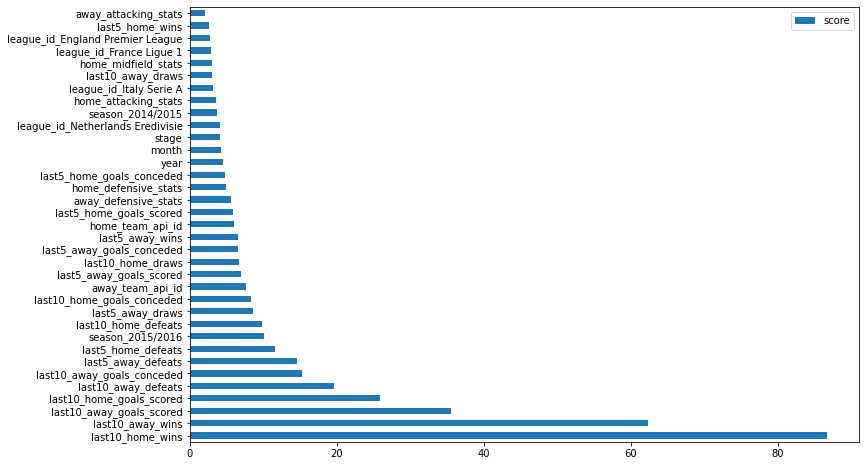

In [107]:
feature_important = model_rf.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(len(list(final_df)), columns="score").plot(kind='barh', figsize = (12,8));

In [106]:
from sklearn.metrics import classification_report

y_pred = model_rf.predict(X_test)
# Generate class membership probabilities
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.49      0.90      0.64      2358
         1.0       0.51      0.30      0.38      1512
         2.0       0.31      0.00      0.01      1326

    accuracy                           0.50      5196
   macro avg       0.44      0.40      0.34      5196
weighted avg       0.45      0.50      0.40      5196



* Perceptron

In [77]:
from sklearn.linear_model import Perceptron

param_grid_percep= {
            'alpha': [np.power(10.,i) for i in range(-6,4)],
            'penalty': ['l1','l2','elasticnet',None],
}

grid_percep = GridSearchCV(Perceptron(early_stopping=True, n_iter_no_change=100, max_iter=1500), param_grid_percep, cv=kfold)

In [78]:
grid_percep.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Perceptron(early_stopping=True, max_iter=1500,
                                  n_iter_no_change=100),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0,
                                   10.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [79]:
print(grid_percep.best_params_)
model_percep = grid_percep.best_estimator_
from sklearn import  metrics
print("precision_score: {}".format(metrics.precision_score(y_test, model_percep.predict(X_test),average='weighted') ))
print("recall_score: {}".format( metrics.recall_score(y_test, model_percep.predict(X_test),average='weighted') ))
print("f1_score: {}".format( metrics.f1_score(y_test, model_percep.predict(X_test),average='weighted') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model_percep.predict(X_test)) ))

{'alpha': 10.0, 'penalty': 'elasticnet'}
precision_score: 0.20594408205281375
recall_score: 0.45381062355658197
f1_score: 0.2833162431417581
accuracy_score: 0.45381062355658197


c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
##########################################################################################################

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

* MLPClassifier

In [149]:
from sklearn.neural_network import MLPClassifier

param_grid_mlp= {
    
            # 'alpha': [12,15],
            # 'batch_size': [200],   
            # 'learning_rate_init': [0.0001]    
            'alpha': [8,10,12],
            'batch_size': [300,350],   
            'learning_rate_init': [0.0001],
            # 'hidden_layer_sizes': [(100,),(50,50),(50,50,50)]       
            
            # 'alpha': [np.power(10.,i) for i in range(-1,5)],
            # 'batch_size': [300,500],   
            # 'learning_rate_init': [np.power(10.,i) for i in range(-5,-3)]
            #          
            # # 'batch_size': [200,300,500],   
            # 'learning_rate_init': [np.power(10.,i) for i in range(-5,1)]      
}

grid_mlp = GridSearchCV(MLPClassifier(activation="logistic",max_iter=1000, early_stopping=True, n_iter_no_change=100 ), param_grid_mlp, cv=kfold)

In [150]:
grid_mlp.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=MLPClassifier(activation='logistic', early_stopping=True,
                                     max_iter=1000, n_iter_no_change=100),
             param_grid={'alpha': [8, 10, 12], 'batch_size': [300, 350],
                         'learning_rate_init': [0.0001]})

In [155]:
print(grid_mlp.best_params_)
model_mlp = grid_mlp.best_estimator_
from sklearn import  metrics        
print("precision_score: {}".format(metrics.precision_score(y_test, model_mlp.predict(X_test_scaled),average='weighted') ))
print("recall_score: {}".format( metrics.recall_score(y_test, model_mlp.predict(X_test_scaled),average='weighted') ))
print("f1_score: {}".format( metrics.f1_score(y_test, model_mlp.predict(X_test_scaled),average='weighted') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model_mlp.predict(X_test_scaled)) ))

{'alpha': 10, 'batch_size': 300, 'learning_rate_init': 0.0001}
precision_score: 0.3707203535861911
recall_score: 0.4924942263279446
f1_score: 0.3918781225430467
accuracy_score: 0.4924942263279446


c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
print(grid_mlp.best_params_)
model_mlp = grid_mlp.best_estimator_
from sklearn import  metrics
print("precision_score: {}".format(metrics.precision_score(y_test, model_mlp.predict(X_test),average='weighted') ))
print("recall_score: {}".format( metrics.recall_score(y_test, model_mlp.predict(X_test),average='weighted') ))
print("f1_score: {}".format( metrics.f1_score(y_test, model_mlp.predict(X_test),average='weighted') ))
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model_mlp.predict(X_test)) ))

{'alpha': 15, 'batch_size': 300, 'learning_rate_init': 0.0001}
precision_score: 0.4077226508223968
recall_score: 0.4591993841416474
f1_score: 0.36067636147077964
accuracy_score: 0.4591993841416474


In [134]:
X_train

,stage,home_team_api_id,away_team_api_id,last5_home_wins,last5_home_draws,last5_home_defeats,last5_away_wins,last5_away_draws,last5_away_defeats,last5_home_goals_scored,...,league_id_Spain LIGA BBVA,league_id_Switzerland Super League,season_2008/2009,season_2009/2010,season_2010/2011,season_2011/2012,season_2012/2013,season_2013/2014,season_2014/2015,season_2015/2016
16214,38,9938,9925,2.0,0.0,3.0,3.0,1.0,1.0,4.0,...,0,0,0,0,0,0,1,0,0,0
9948,2,9873,8521,1.0,3.0,1.0,1.0,2.0,2.0,5.0,...,0,0,0,0,0,1,0,0,0,0
10054,5,8021,2186,1.0,2.0,2.0,0.0,1.0,4.0,3.0,...,0,0,0,0,0,1,0,0,0,0
3511,4,10000,8635,2.0,3.0,0.0,5.0,0.0,0.0,10.0,...,0,0,0,1,0,0,0,0,0,0
23970,15,8592,9829,3.0,1.0,1.0,3.0,1.0,1.0,6.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,22,8613,9773,1.0,2.0,2.0,4.0,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
5390,18,8467,10251,1.0,2.0,2.0,3.0,1.0,1.0,8.0,...,0,0,0,1,0,0,0,0,0,0
860,10,8549,8456,1.0,1.0,3.0,2.0,1.0,2.0,2.0,...,0,0,1,0,0,0,0,0,0,0
15795,26,10264,10215,3.0,0.0,2.0,0.0,1.0,4.0,9.0,...,0,0,0,0,0,0,1,0,0,0


SIEC NEURONOWA

In [423]:
# no = 4000
# X_train_nn = X_train_scaled[no:]
# X_val_nn = X_train_scaled[:no]
# y_train_nn = y_train[no:]
# y_val_nn = y_train[:no]

X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [424]:
import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import History

history0 = History()
# model_simplenn = Sequential()
# model_simplenn.add(Dense(100,activation="sigmoid",input_shape=(X_train_nn.shape[1],)))
# model_simplenn.add(Dense(50,activation="sigmoid"))
# model_simplenn.add(Dense(25,activation="sigmoid"))
# model_simplenn.add(Dense(3,activation="softmax"))

model_simplenn = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_nn.shape[1],)),
    keras.layers.Dense(20,use_bias=False),
    BatchNormalization(),
    Activation("relu"),
    # Dropout(0.1),
    keras.layers.Dense(6,use_bias=False),
    # BatchNormalization(),
    # Activation("relu"),
    # Dropout(0.1),
    keras.layers.Dense(3, activation="softmax")
])

model_simplenn.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 51)                0         
                                                                 
 dense_80 (Dense)            (None, 20)                1020      
                                                                 
 batch_normalization_20 (Bat  (None, 20)               80        
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 20)                0         
                                                                 
 dense_81 (Dense)            (None, 6)                 120       
                                                                 
 dense_82 (Dense)            (None, 3)                 21        
                                                     

In [425]:
model_simplenn.compile(loss="sparse_categorical_crossentropy",optimizer="Adam", metrics=["accuracy"])

callback = tf.keras.callbacks.ModelCheckpoint('best_model_2.h5', monitor='val_loss', mode='min', verbose=1)

In [430]:
history0 = model_simplenn.fit(X_train_nn, y_train_nn, validation_data= (X_val_nn, y_val_nn), batch_size=200,epochs=50,callbacks=[callback])

Epoch 1/50
32/63 [==============>...............] - ETA: 0s - loss: 1.0031 - accuracy: 0.5083
Epoch 1: saving model to best_model_2.h5
63/63 [==============================] - 0s 3ms/step - loss: 1.0074 - accuracy: 0.5032 - val_loss: 1.0129 - val_accuracy: 0.5034
Epoch 2/50
33/63 [==============>...............] - ETA: 0s - loss: 1.0069 - accuracy: 0.4962
Epoch 2: saving model to best_model_2.h5
63/63 [==============================] - 0s 3ms/step - loss: 1.0059 - accuracy: 0.5021 - val_loss: 1.0130 - val_accuracy: 0.5036
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 1.0049 - accuracy: 0.5038
Epoch 3: saving model to best_model_2.h5
63/63 [==============================] - 0s 3ms/step - loss: 1.0049 - accuracy: 0.5038 - val_loss: 1.0132 - val_accuracy: 0.5038
Epoch 4/50
31/63 [=============>................] - ETA: 0s - loss: 1.0017 - accuracy: 0.5085
Epoch 4: saving model to best_model_2.h5
63/63 [==============================] - 0s 3ms/step - loss: 1.0037 - acc

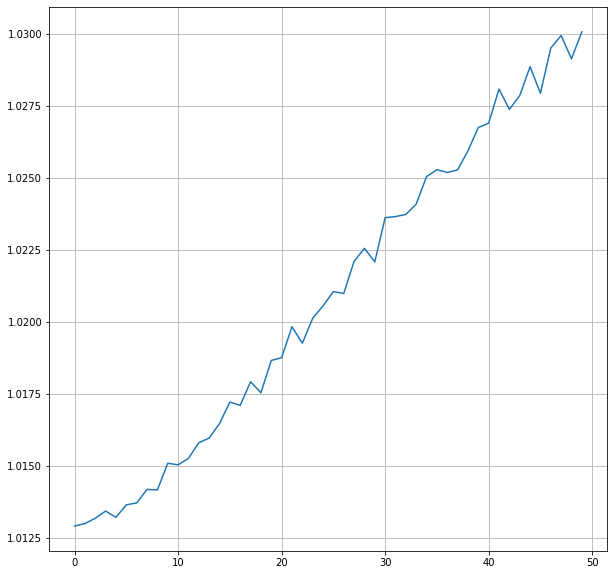

In [431]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history0.history)
plt.figure(figsize=(10,10))
# history_df['val_accuracy'].plot()
history_df['val_loss'].plot()
plt.grid(True)
# plt.gca().set_ylim(0.4, 0.55)
plt.show()

In [432]:
model_simplenn.evaluate(X_test_scaled, y_test, batch_size=250)

21/21 [==============================] - 0s 1ms/step - loss: 1.0391 - accuracy: 0.4842


[1.0390629768371582, 0.48421862721443176]

In [433]:
# load a saved model
from keras.models import load_model
saved_model = load_model('best_model.h5')
print(saved_model.evaluate(X_test_scaled, y_test))

saved_model2 = load_model('best_model_2.h5')
print(saved_model2.evaluate(X_test_scaled, y_test))

163/163 [==============================] - 0s 732us/step - loss: 1.0168 - accuracy: 0.4987
[1.0167584419250488, 0.4986528158187866]
163/163 [==============================] - 0s 750us/step - loss: 1.0391 - accuracy: 0.4842
[1.0390629768371582, 0.48421862721443176]
